In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from src.my_functions import plot as mfp


Fist let's import the cleaned dataset for the study.

In [2]:
df = pd.read_csv('data/cleaned_shark_attacks.csv')

## Comparison USA vs AUSTRALIA

According to information from different references __[1](https://www.newsweek.com/shark-attack-which-country-most-deadly-699748)__ __[2](https://en.wikipedia.org/wiki/Shark_attack)__, *USA* shows the larger number of shark attacks. However. it is *Australia* the country with the deadliest shark attact rate.

Therefore, my motive for this study is to verify whether this assumption is true or not based on the dataset *Global Shark Attacks* from __[Kaggle](https://www.kaggle.com/teajay/global-shark-attacks)__ and also find additional differences between those two countries.

The following questions will be answered by visualization:
* Which country has the largest number of cases? and which one with highest rates of fatality?
* Which areas are more affected by shark attacks? 
* Is there any seasonality during the year on those numbers?
* What's the trend in the number of attacks during the last decades?
* What are the top5 most dangerous species per country?

### Which country has the largest number of cases? and which one with highest rates of fatality?

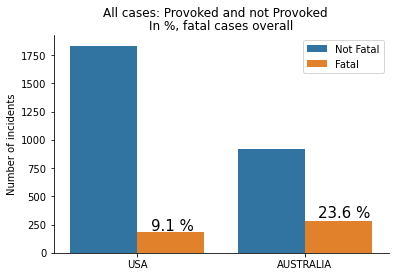

In [4]:
mfp.plot_cases(df)

On the chart above, it can be inferred that *USA* shows larger number of total reported incidents but *Australia* indeed presents the highest number of fatal incidents, either in absolute and relative terms.

One may think this finding could be highly affected by the nature of the attacks, meaning that perhaps in Australia most of the attacks are provoked by human behaviour and therefore the statistics are biased.

Let's put that variable out of the equation and plot the same chart but this time showing only not provoked cases.

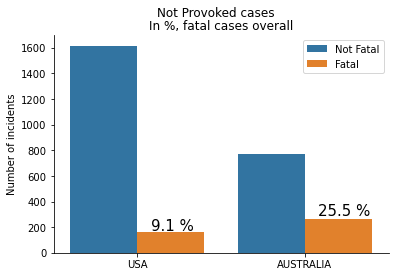

In [6]:
mfp.plot_cases(df, True)

The chart proves that previous results were not biased by Australians behaviour at all, in fact the gap between USA and Australia has even increased.

### Which areas are more affected by shark attacks? 

Ok, Australia and USA are the most dangerous countries in the world related to shark attacks. But these two countries are quite large and its coastline lenght as well.

According to [this](https://en.wikipedia.org/wiki/List_of_countries_by_length_of_coastline):

USA: 19,924 km

Australia: 25,760 km

I am pretty sure shark attacks are not evenly distributed throughout the coast. There must be areas with higher shark attacks rates than others. 

Let's find out the hottest area per country (top10 for US, top8 for Australia). 

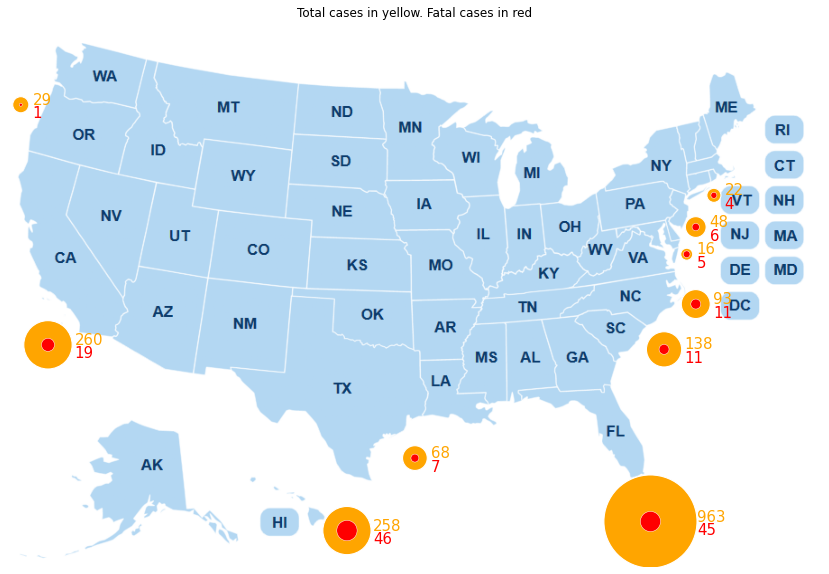

In [4]:
mfp.plot_areas(df,'USA')


Based on the map above, it looks like the east cost of USA (Atlantic Sea) is the more dangerous than the western coast (Pacific Sea) with Florida leading the rank. This seems to be in line with [this article](https://www.nationalgeographic.com/animals/2019/07/shark-attacks-atlantic-ocean/).   


Regarding Australia, it looks like the east coast has more number of shark attacks.

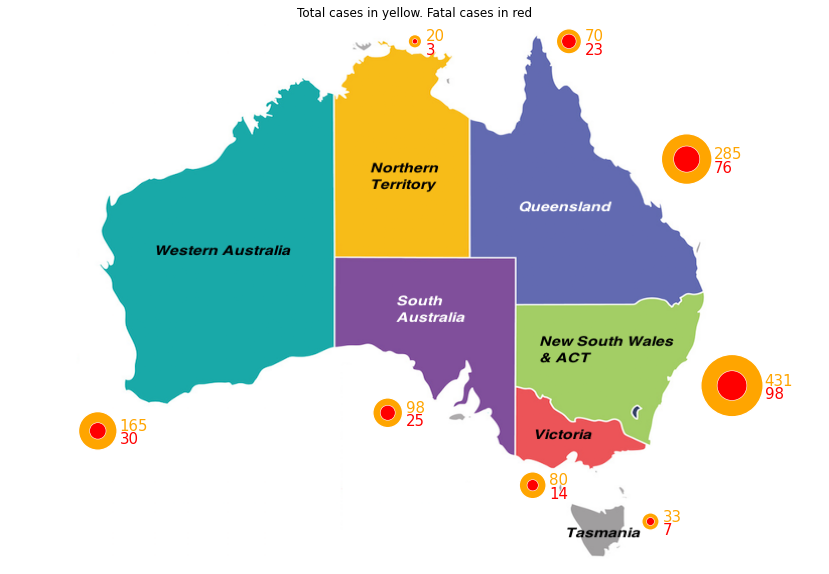

In [5]:
mfp.plot_areas(df,'AUSTRALIA')

### Is there any seasonality during the year on those numbers?

Being USA and Australia in different hemispheres, let's find out if there is any pattern in shark attacks activity throughout the different seasons in a year.

Based on the following plot, it seems there is always more shark attacks reported during summer months.

Reason of this pattern may be two fold. One, summer is a time period where humans are more likely to be in the water.
Secondly, during summertime sharks tend to migrate inshore. See this [article](https://myfwc.com/research/saltwater/sharks-rays/shark-attacks/education/) and this [one](https://www.thoughtco.com/weather-and-shark-attacks-3444122).

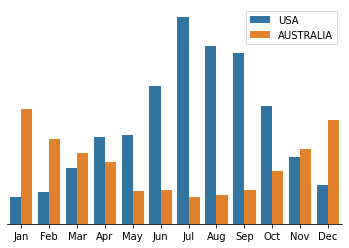

In [5]:
mfp.plot_season_trend(df)

### What's the trend in the number of attacks during the last decades?

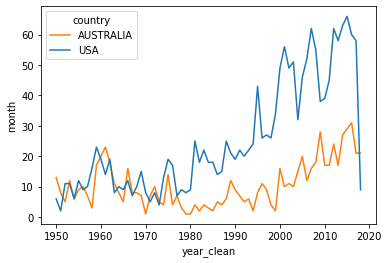

In [23]:

df_temp = df.fillna('no').groupby(['country','year_clean']).month.count().reset_index()
initial_year = 1950
ending_year = df_temp.year_clean.max()

df_temp = df_temp[(df_temp.year_clean >= initial_year) &(df_temp.year_clean <= ending_year)]



my_palette = {'USA': sns.color_palette()[0], 'AUSTRALIA':sns.color_palette()[1]}
sns.lineplot(x = df_temp.year_clean, y = df_temp.month, hue = df_temp.country, palette=my_palette)

plt.show()

### What are the top5 most dangerous species per country?

In [134]:
df_temp =df.groupby(['country','species_clean']).count().groupby('country').year_clean.sum()

In [135]:
df_temp2 = df.groupby(['country','species_clean']).count().sort_values('year_clean', ascending=False)\
                                        .groupby('country').year_clean.head(5).reset_index()



In [136]:
df_temp2['total']=0
for country in df.country.unique():
    df_temp2['total'] = np.where(df_temp2['country']==country, df_temp[country], df_temp2['total'])
    

In [137]:
df_temp2['shark_perc'] = round((df_temp2.year_clean / df_temp2.total) * 100, 1)

In [155]:
df_temp3 = pd.DataFrame()
df_temp3['species_total'] = df.groupby(['country','species_clean']).was_fatal.count()
df_temp3['total_fatal'] = df.groupby(['country','species_clean']).was_fatal.sum()
df_temp3['rate_fatal'] = round(df_temp3['total_fatal']/df_temp3['species_total'] * 100, 1)
df_temp3 = df_temp3.reset_index()
new_df = df_temp2.merge(df_temp3, how = 'inner', left_on=['country', 'species_clean'], right_on=['country', 'species_clean'])

In [160]:
df_temp2

,country,species_clean,year_clean,total,shark_perc
0,USA,white,200,647,30.9
1,AUSTRALIA,white,150,426,35.2
2,USA,tiger,109,647,16.8
3,USA,bull,70,647,10.8
4,AUSTRALIA,whaler,56,426,13.1
5,AUSTRALIA,tiger,54,426,12.7
6,AUSTRALIA,nurse,44,426,10.3
7,AUSTRALIA,wobbegong,43,426,10.1
8,USA,spinner,42,647,6.5
9,USA,blacktip,41,647,6.3


In [154]:
new_df

,country,species_clean,year_clean,total,shark_perc,species_total,total_fatal,rate_fatal
0,USA,white,200,647,30.9,199,19.0,9.5
1,AUSTRALIA,white,150,426,35.2,149,49.0,32.9
2,USA,tiger,109,647,16.8,109,13.0,11.9
3,USA,bull,70,647,10.8,70,6.0,8.6
4,AUSTRALIA,whaler,56,426,13.1,55,2.0,3.6
5,AUSTRALIA,tiger,54,426,12.7,52,14.0,26.9
6,AUSTRALIA,nurse,44,426,10.3,43,1.0,2.3
7,AUSTRALIA,wobbegong,43,426,10.1,43,0.0,0.0
8,USA,spinner,42,647,6.5,42,0.0,0.0
9,USA,blacktip,41,647,6.3,41,0.0,0.0


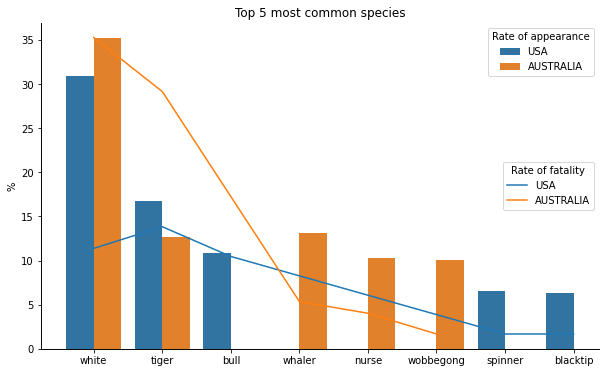

In [181]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
sns.barplot(x = df_temp2.species_clean, y = df_temp2.shark_perc, hue = df_temp2.country, palette = my_palette)
ax2 = ax.twinx()
sns.lineplot(ax=ax2, x = new_df.species_clean, y = new_df.rate_fatal, hue = new_df.country, palette = my_palette)

ax2.grid(False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_yticks([])
ax2.yaxis.set_visible(False)
ax.set_xlabel('') 
ax.set_ylabel('%') 


plt.title('Top 5 most common species')



ax.legend(title= 'Rate of appearance',loc='upper right')

ax2.legend(title= 'Rate of fatality', loc='center right')